In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
# We proceed with EDA process

df.shape

(1517, 14)

In [4]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
Unnamed: 0      1517 non-null int64
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [5]:
#finding the keys/column
df.keys()

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
#top 5 

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
#last 5 lines information
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [8]:
#drop Unnamed: 0 Column because is similar to serial no column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [9]:
#finding the unique values
df['type'].unique()

array(['conventional'], dtype=object)

In [10]:
#check the null values without using visualization
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

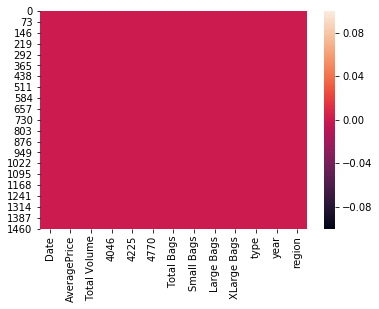

In [11]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [12]:
#finding the metrics of the dataset

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [13]:
#finding the  corelation and diagonal value is one

dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [14]:
df = pd.DataFrame(data=df)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [15]:
#finding the datatypes of dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

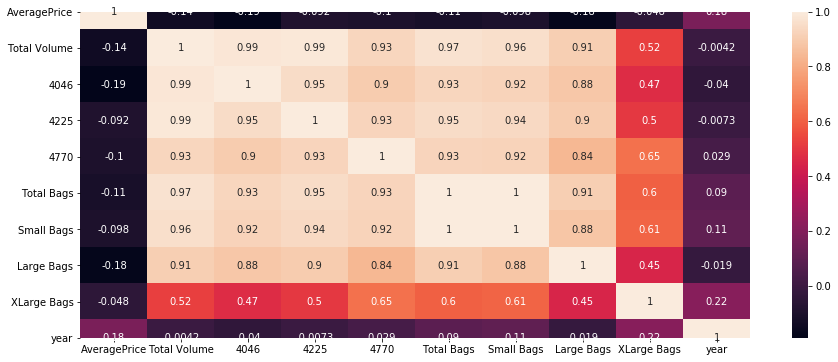

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor, color="Blue", annot=True)

In [17]:
#am dropping the type column since its showing only one unique value.
df.drop(['type'],axis=1,inplace=True)
#Date Column is not useful to predict the output so dropping Date Column.
df.drop(['Date'],axis=1,inplace=True)

df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [18]:
#Checking the uniqueness in region column
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
#Converting the region Column to number by using Label encoder

import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

array1 = df['region']

array1.shape

le=LabelEncoder()
df1=le.fit_transform(df['region'])
df1

array([0, 0, 0, ..., 7, 7, 7])

In [20]:
df['region'] = df1
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [21]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [22]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [23]:
#after changing the region column to integer values.
#lets do again EDA process to check the region value.
df.shape

(1517, 11)

In [24]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region            int32
dtype: object

In [25]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000


In [26]:
dfcor = df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


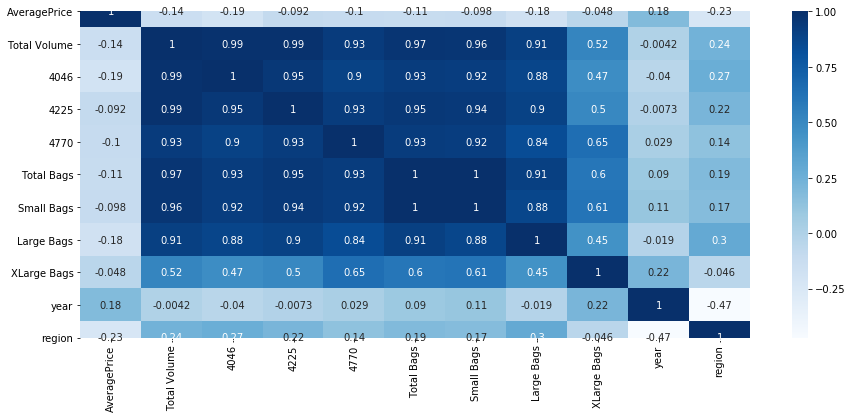

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

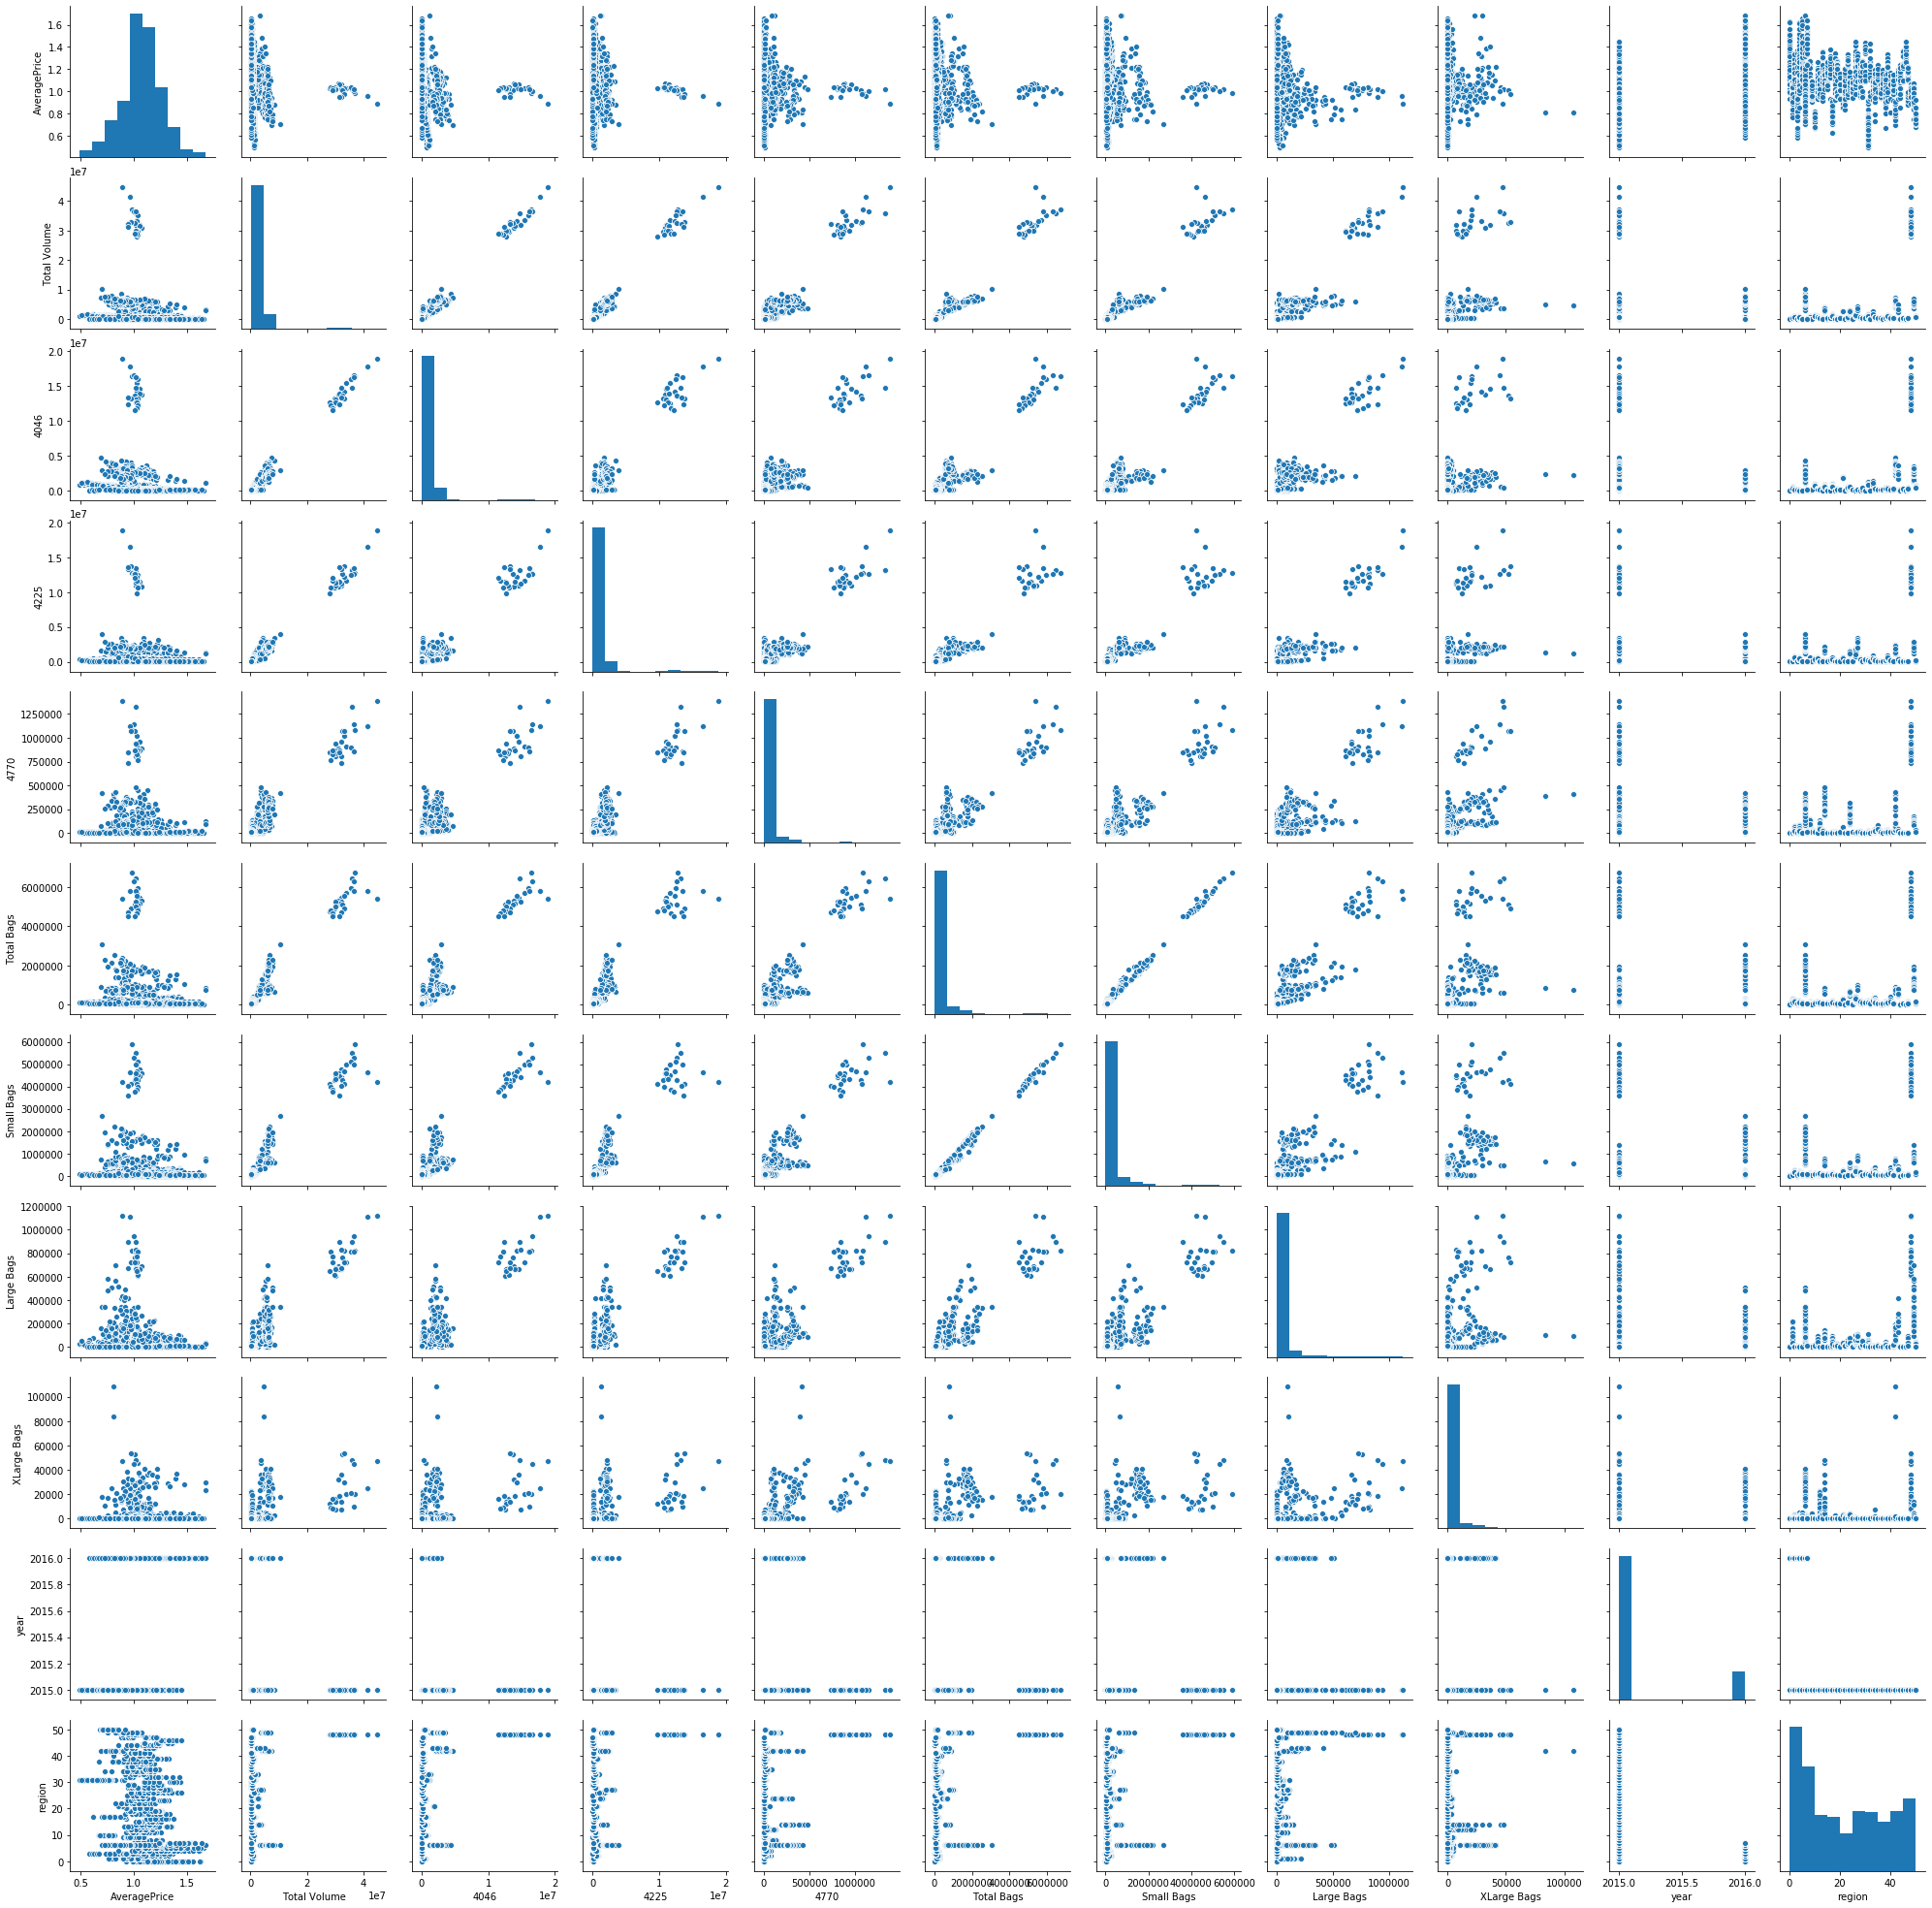

In [28]:
sns.pairplot(df)

In [29]:
#Checking the Skewness and remove it
df.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

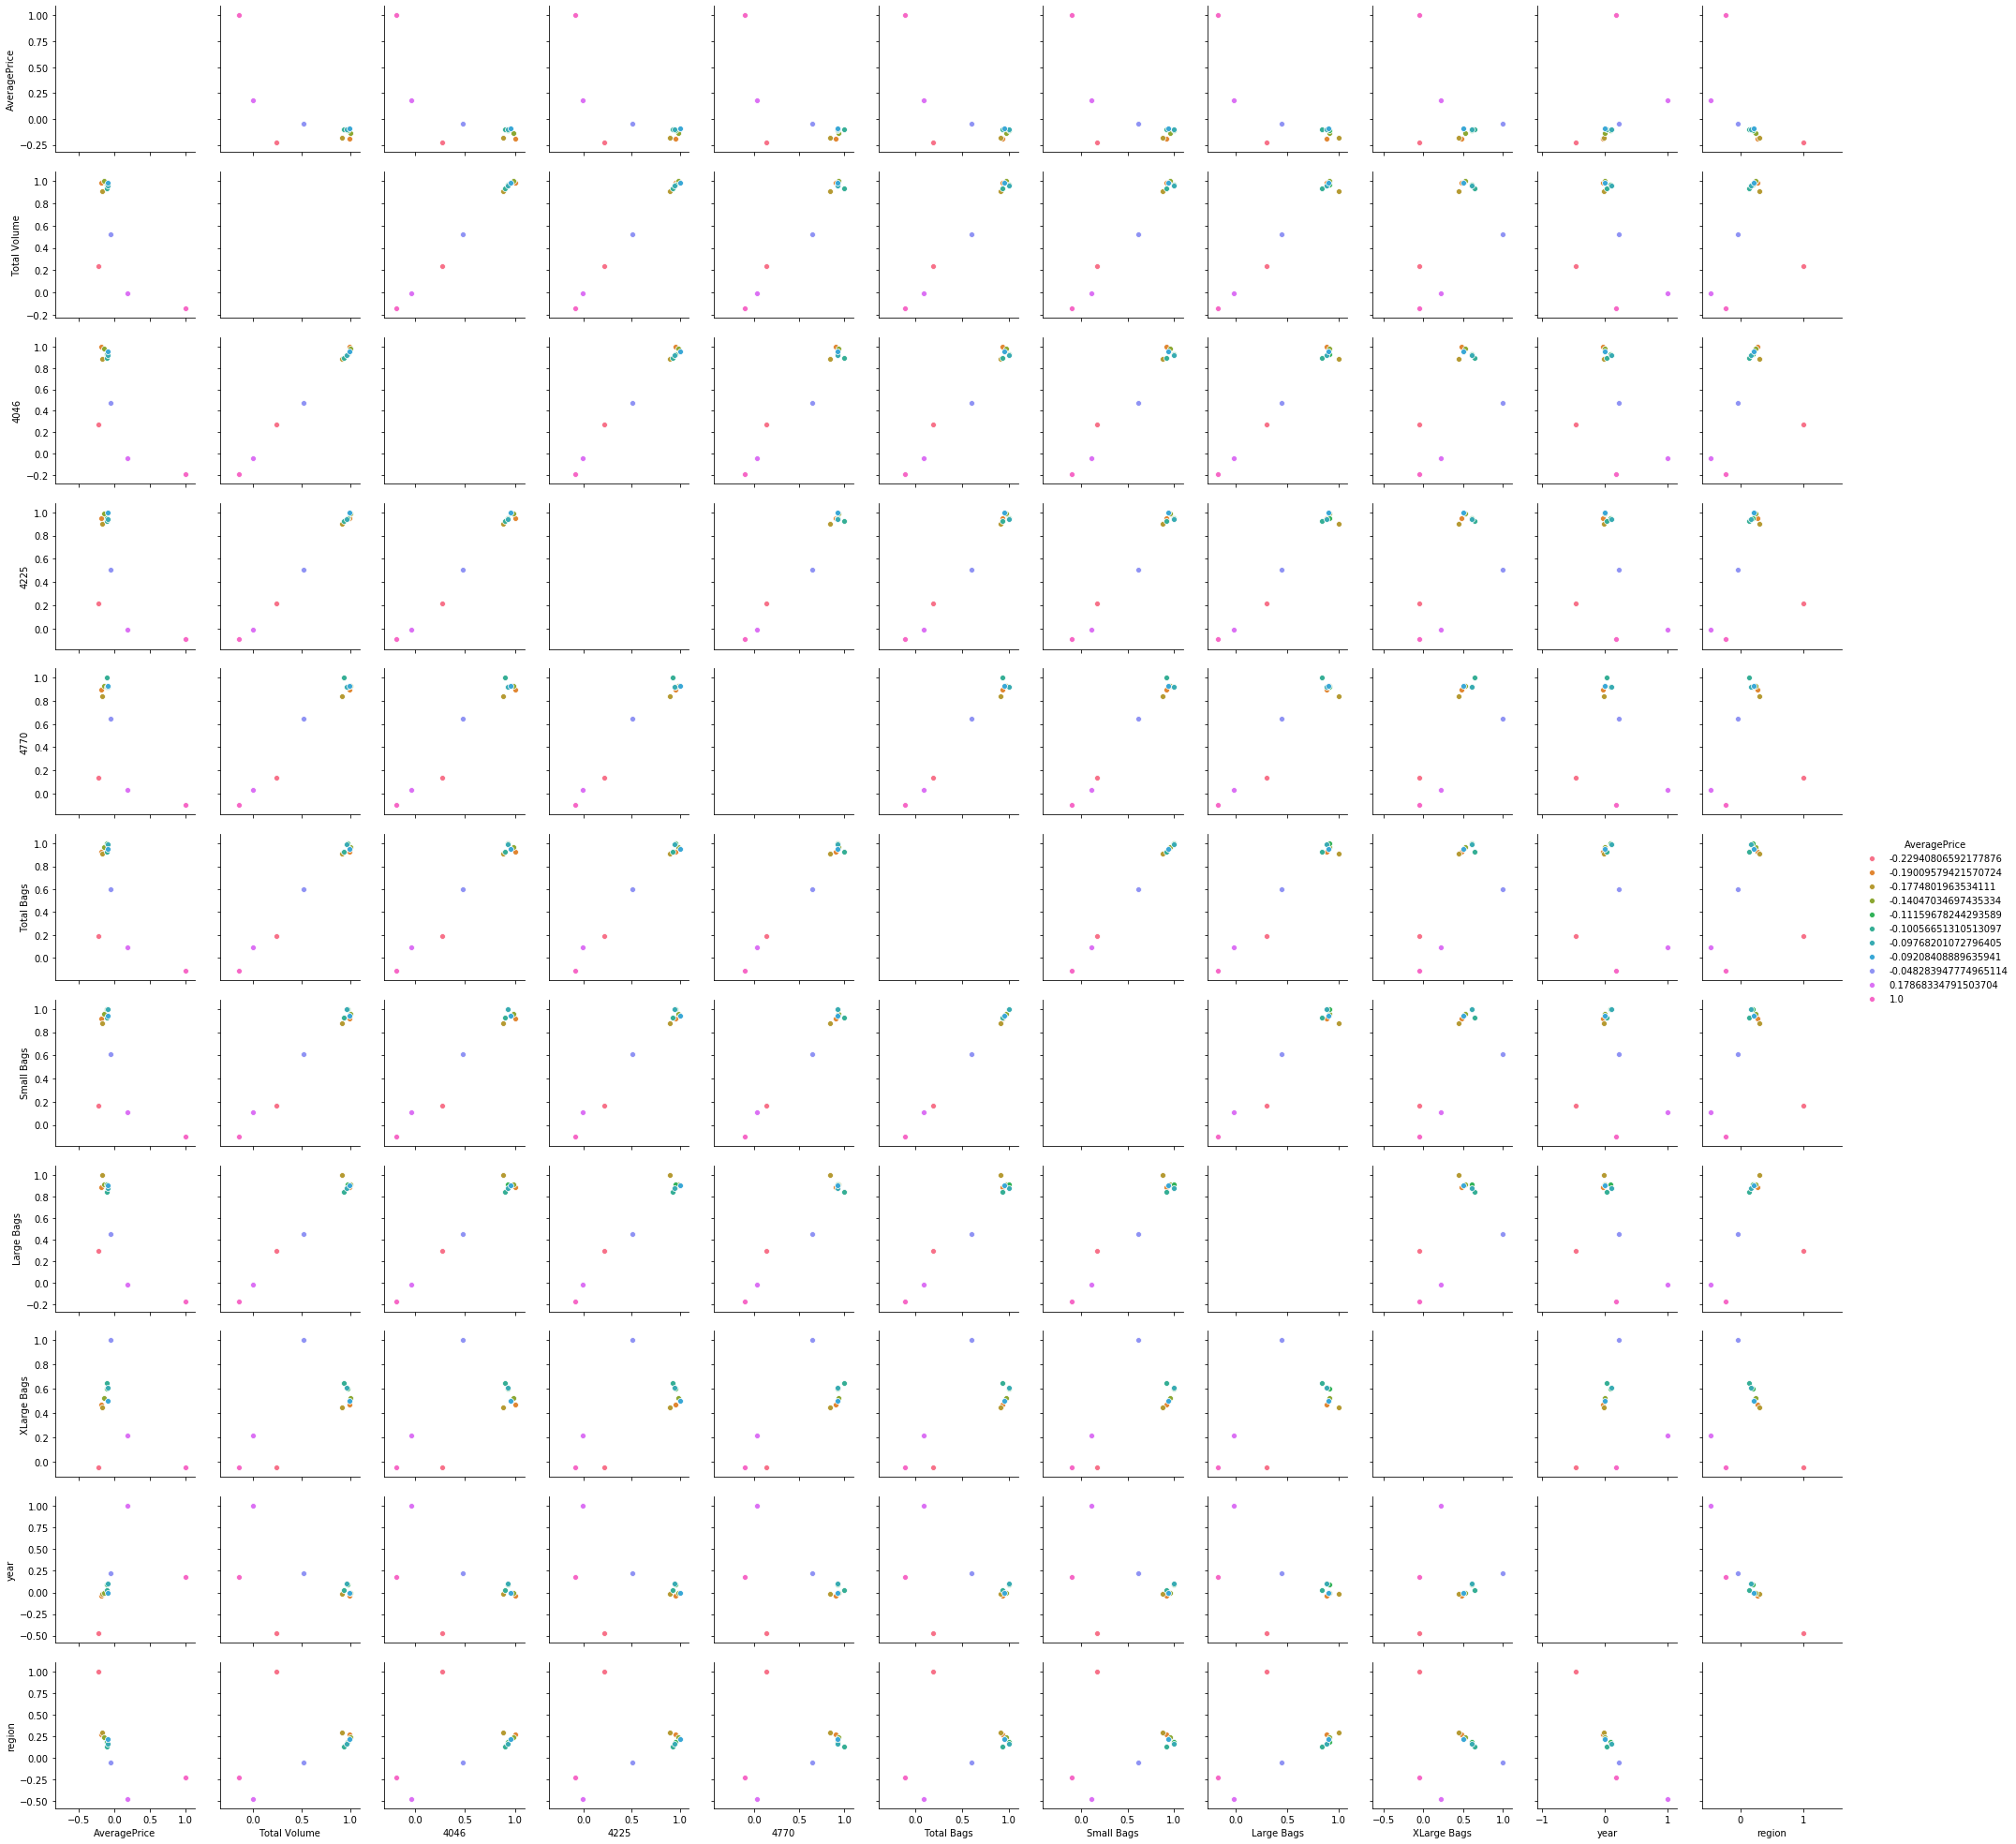

In [30]:
sns.pairplot(dfcor, hue="AveragePrice" )

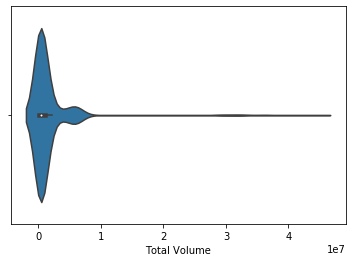

In [31]:
#violin plot representation with respect to each column

sns.violinplot(x="Total Volume",data=df)

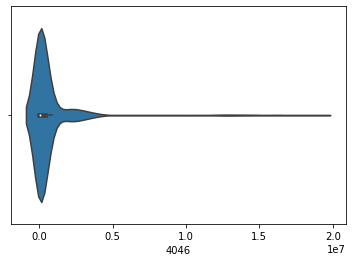

In [32]:
sns.violinplot(x="4046",data=df)

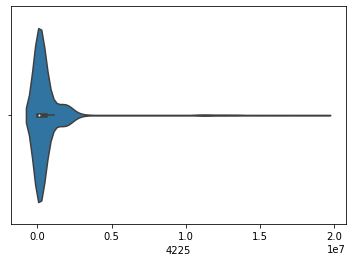

In [33]:
sns.violinplot(x="4225",data=df)

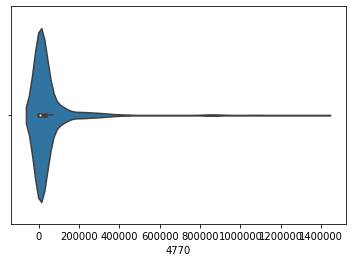

In [34]:
sns.violinplot(x="4770",data=df)

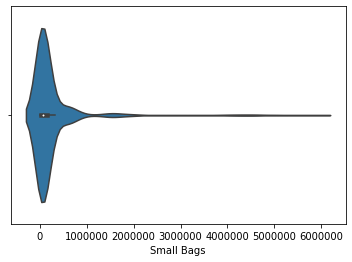

In [35]:
sns.violinplot(x="Small Bags",data=df)

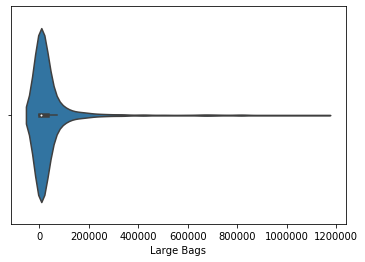

In [36]:
sns.violinplot(x="Large Bags",data=df)

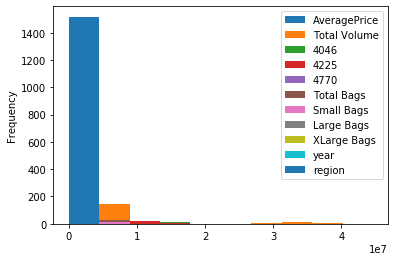

In [37]:
df.plot.hist()

In [38]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


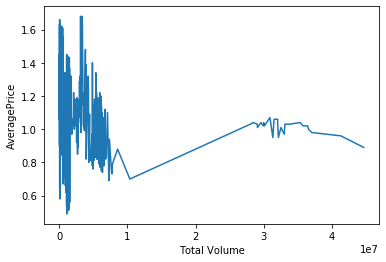

In [39]:
#line plot

sns.lineplot(df["Total Volume"],df["AveragePrice"])
plt.show()

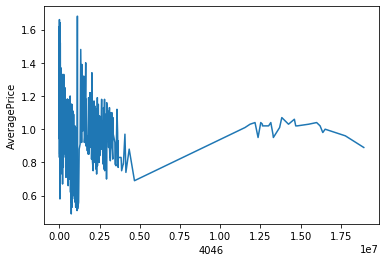

In [40]:
sns.lineplot(df["4046"],df["AveragePrice"])
plt.show()

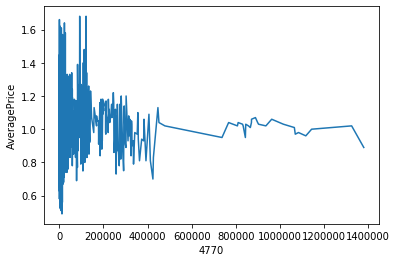

In [41]:
sns.lineplot(df["4770"],df["AveragePrice"])
plt.show()

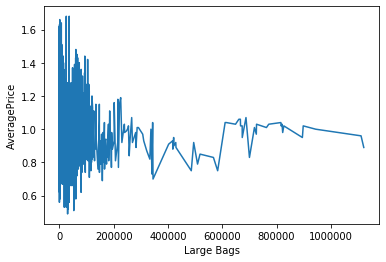

In [42]:
sns.lineplot(df["Large Bags"],df["AveragePrice"])
plt.show()

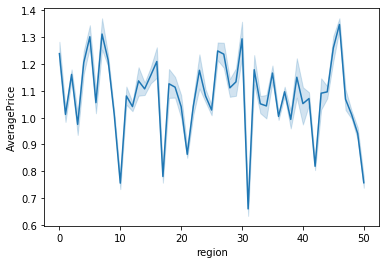

In [43]:
sns.lineplot(df["region"],df["AveragePrice"])
plt.show()

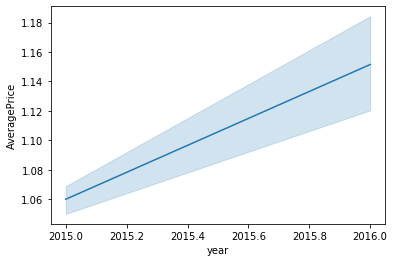

In [44]:
sns.lineplot(df["year"],df["AveragePrice"])
plt.show()

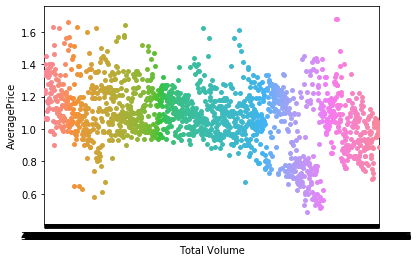

In [45]:
ax=sns.stripplot(x='Total Volume',y="AveragePrice",data=df);

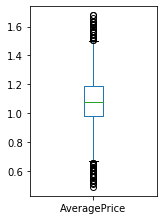

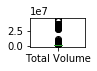

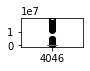

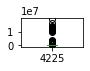

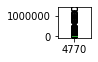

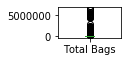

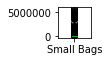

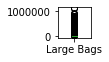

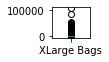

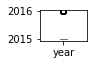

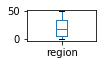

In [46]:
#box plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

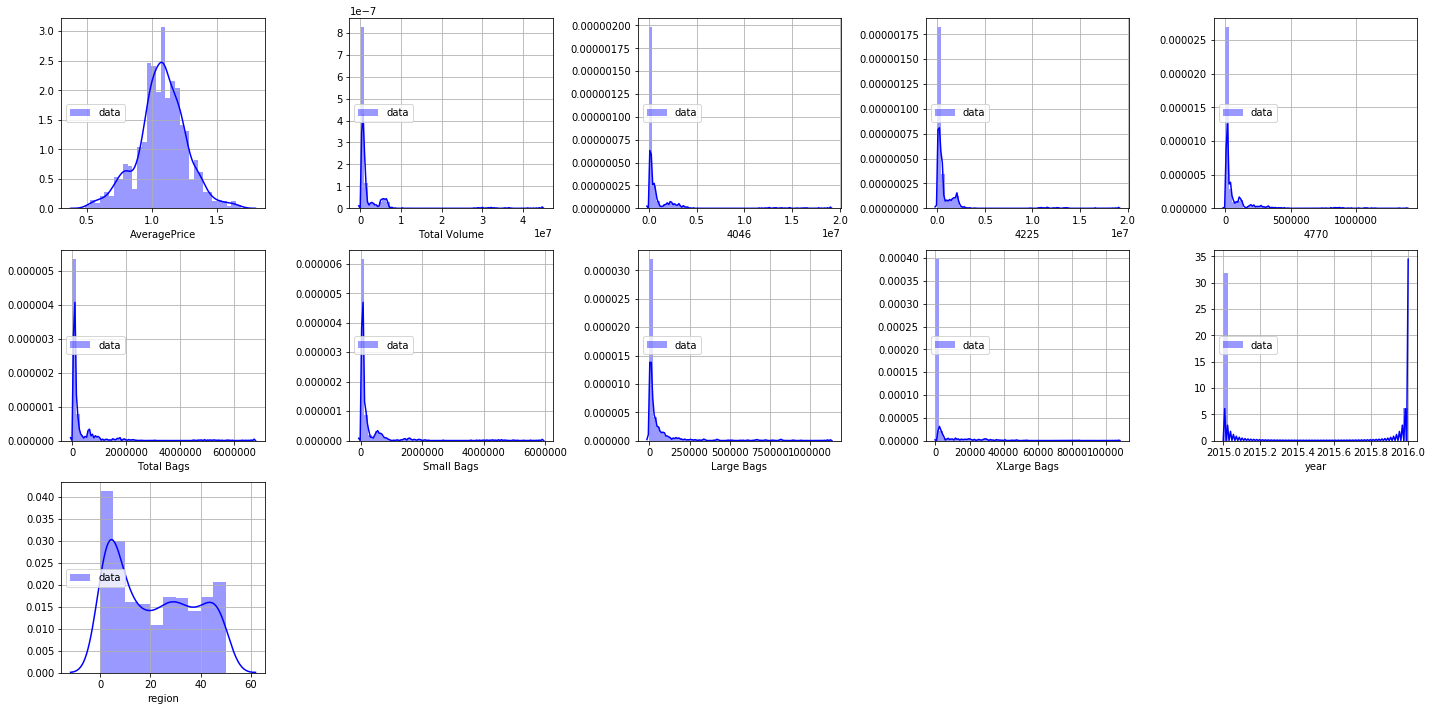

In [47]:
#Disti plot through iteration

plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='b',kde=True,label='data')
    plt.grid()
    plt.legend(loc='center left')
    plt.tight_layout()

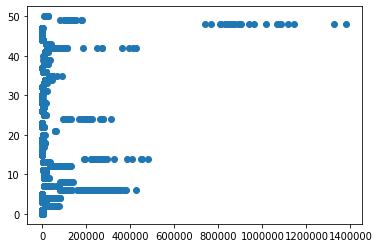

In [48]:
#scatterplot
plt.scatter(df['4770'],df['region'])

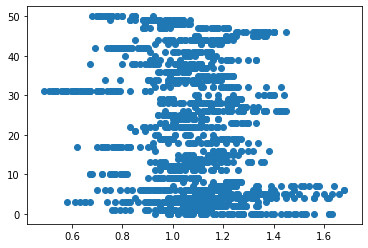

In [49]:
plt.scatter(df['AveragePrice'],df['region'])

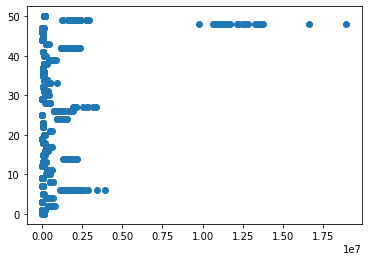

In [50]:
plt.scatter(df['4225'],df['region'])

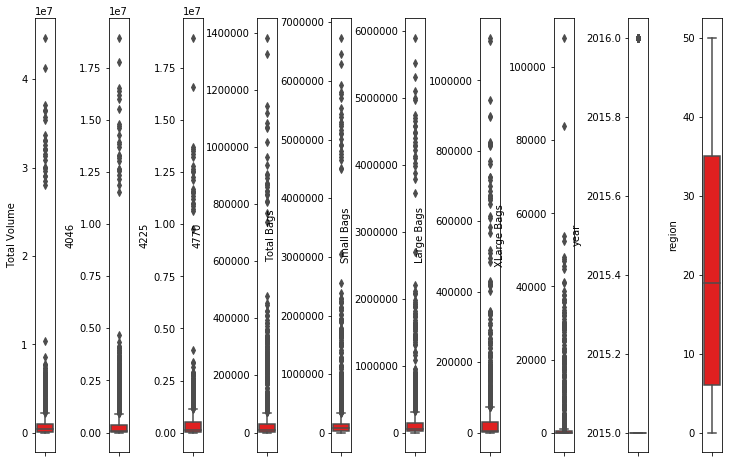

In [51]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [52]:
#finding the skewness of the dataset

df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [53]:
##there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()
       

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags      0.166210
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

In [54]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (1517, 11)
df1.shape: (1502, 11)
z value is: [[1.35048079 1.35676174 1.82816171 ... 0.81077519 0.44100815 1.3143384 ]
 [1.45639674 1.46638736 2.01206913 ... 0.81077519 0.44100815 1.3143384 ]
 [0.76783831 0.9321394  1.94183376 ... 0.81077519 0.44100815 1.3143384 ]
 ...
 [2.14485045 0.64565294 0.20190426 ... 1.10389091 2.26753179 0.88028586]
 [2.09189247 0.60503087 0.13577946 ... 0.81077519 2.26753179 0.88028586]
 [1.88006056 0.62805557 0.23299293 ... 0.81077519 2.26753179 0.88028586]]


In [55]:
#am dropping year column year this is not necessary to predict the output
df.drop("year", axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,20.665669,0.000000,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,21.067687,0.000000,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,21.582864,0.000000,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,24.044267,0.000000,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,28.002574,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,85.475342,5.485958,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,82.069716,0.000000,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,81.343771,6.716595,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,81.387622,0.000000,7


In [56]:
#lets seperate the X and Y value to predit the values

X = df.drop("AveragePrice", axis=1)
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,20.665669,0.000000,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,21.067687,0.000000,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,21.582864,0.000000,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,24.044267,0.000000,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,28.002574,0.000000,0
...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,85.475342,5.485958,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,82.069716,0.000000,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,81.343771,6.716595,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,81.387622,0.000000,7


In [57]:
Y = df["AveragePrice"]
Y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [58]:
#Scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.35676174, -1.82816171, -0.56752404, ..., -1.16438082,
        -0.81077519, -1.3143384 ],
       [-1.46638736, -2.01206913, -0.68423257, ..., -1.15548123,
        -0.81077519, -1.3143384 ],
       [-0.9321394 , -1.94183376, -0.15924137, ..., -1.1440766 ,
        -0.81077519, -1.3143384 ],
       ...,
       [-0.64565294, -0.20190426, -0.58460671, ...,  0.17886839,
         1.10389091, -0.88028586],
       [-0.60503087, -0.13577946, -0.57688492, ...,  0.17983914,
        -0.81077519, -0.88028586],
       [-0.62805557, -0.23299293, -0.5703497 , ...,  0.31882269,
        -0.81077519, -0.88028586]])

In [59]:
X.shape

(1517, 9)

In [60]:
Y.shape # here in col place we have 1 column value

(1517,)

In [61]:
Y = Y.values.reshape(-1,1)
Y

array([[1.33],
       [1.35],
       [0.93],
       ...,
       [1.48],
       [1.47],
       [1.43]])

In [62]:
Y.shape

(1517, 1)

In [63]:
#Applying Linear Regression
#finding the shape of the Trainng and testing part using train_test_split librery.
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [64]:
train_X.shape

(1016, 9)

In [65]:
train_Y.shape

(1016, 1)

In [66]:
test_X.shape

(501, 9)

In [67]:
test_Y.shape

(501, 1)

In [68]:
lg = LinearRegression()
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lg.coef_

array([[-0.27560733, -0.01515117,  0.112725  , -0.03321399, -0.12347867,
         0.25997899,  0.03662446,  0.00777886, -0.02183922]])

In [70]:
lg.score(train_X,train_Y)

0.3846814345430922

In [71]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result:",pred)
print("actual result",test_Y)

Predicted result: [[1.07998704]
 [0.92284352]
 [1.30508291]
 [0.97134794]
 [0.98227605]
 [1.15699211]
 [0.94149636]
 [1.05364317]
 [1.1734355 ]
 [1.24364389]
 [1.13036499]
 [1.33981428]
 [1.30364702]
 [1.07602159]
 [0.95250968]
 [1.01040447]
 [1.16906513]
 [0.95635869]
 [1.3173263 ]
 [0.99455719]
 [1.00192217]
 [0.9403915 ]
 [1.09971116]
 [1.14491916]
 [0.95046959]
 [1.03524188]
 [1.03754865]
 [1.01731559]
 [1.09638607]
 [1.0539327 ]
 [1.07258718]
 [0.83625787]
 [1.0239747 ]
 [1.19512397]
 [0.98498568]
 [1.28844638]
 [1.3092338 ]
 [0.95273243]
 [0.94189556]
 [1.08790128]
 [1.2110755 ]
 [1.09429663]
 [1.30132206]
 [1.29360262]
 [1.1289552 ]
 [1.29687974]
 [1.06601347]
 [1.07055541]
 [1.16947742]
 [1.18294798]
 [0.90433183]
 [0.99314136]
 [1.074933  ]
 [1.07194126]
 [0.98136965]
 [1.19348013]
 [1.19193997]
 [1.33884147]
 [1.25518774]
 [1.02796125]
 [1.09252432]
 [1.0822607 ]
 [0.92071866]
 [1.09534204]
 [0.97663984]
 [1.01671745]
 [1.13842336]
 [1.24990143]
 [1.21545078]
 [1.03774246]
 [

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))
print('R2 Score of lg: %.2f' % r2_score(test_Y, pred))

error:
Mean absolute error: 0.11414461809719205
Mean sqaured error: 0.021201237529657968
Root mean squared error: 0.14560644741788725
R2 Score of lg: 0.40


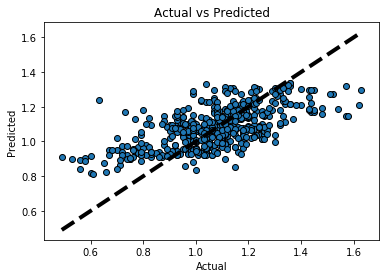

In [73]:
#Visualize the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, pred, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [74]:
#Boosting through GradientBoostRegressor By using Parameters.
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))
#selecting this.

model_Score: 0.8563147887436136
Mean squared error: 0.01
R2 Score: 0.73


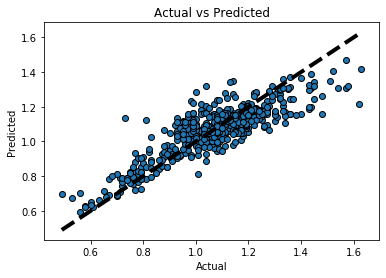

In [76]:
#Visualize the Goodness of the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [77]:
#Linear Regression using Recursion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=58,test_size=0.20)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [78]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.3776124938531692
r2 score corresponding to  43 is 0.4377310367055126
r2 score corresponding to  44 is 0.36785257326888743
r2 score corresponding to  45 is 0.33154600696138004
r2 score corresponding to  46 is 0.4074661188129185
r2 score corresponding to  47 is 0.3828694337434314
r2 score corresponding to  48 is 0.3899000434284796
r2 score corresponding to  49 is 0.3511071413727751
r2 score corresponding to  50 is 0.33067194825304447
r2 score corresponding to  51 is 0.38659172334014147
r2 score corresponding to  52 is 0.35840851448642075
r2 score corresponding to  53 is 0.39894307814324703
r2 score corresponding to  54 is 0.4361895318609801
r2 score corresponding to  55 is 0.4368756281904277
r2 score corresponding to  56 is 0.22053996834883505
r2 score corresponding to  57 is 0.36488066233107763
r2 score corresponding to  58 is 0.3151921803647998
r2 score corresponding to  59 is 0.4042686741714615
r2 score corresponding to  60 is 0.4291495522486124
r2 s

In [79]:
#by using the KNN Model.
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of knn: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of knn: %.2f' % r2_score(test_Y, predicted))

Mean squared error of knn: 0.01
R2 Score of knn: 0.75


In [80]:
#grid_search to find optimal value of n_neighbors for KNN Model
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 19}

In [81]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=19)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.6214189923722443
r2 score corresponding to  43 is 0.6907451855805491
r2 score corresponding to  44 is 0.6495705456383505
r2 score corresponding to  45 is 0.618485475557631
r2 score corresponding to  46 is 0.6287404806039042
r2 score corresponding to  47 is 0.6618673154255387
r2 score corresponding to  48 is 0.6330646968669608
r2 score corresponding to  49 is 0.6086712704783438
r2 score corresponding to  50 is 0.5819395814034394
r2 score corresponding to  51 is 0.6801927599061802
r2 score corresponding to  52 is 0.6674120898655947
r2 score corresponding to  53 is 0.6833091365418582
r2 score corresponding to  54 is 0.703305231267755
r2 score corresponding to  55 is 0.6570067746088311
r2 score corresponding to  56 is 0.5700095249968771
r2 score corresponding to  57 is 0.6222214550713789
r2 score corresponding to  58 is 0.5660439593018527
r2 score corresponding to  59 is 0.6715978305152395
r2 score corresponding to  60 is 0.696661824152617
r2 score corres

In [82]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.15624009713844406
std deviation in r2 score for Linear Regression: 0.15826420635475472

Mean r2 score for KNN Regression:  -0.023131387688516126
std deviation in r2 score for KNN Regression: 0.33986816867444397


In [83]:
#Boosting Linear Regression and KNN Model
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

print("\n")
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.2175944484183951
std deviation in r2 score for ada boosting Regression:  0.17088044424393734


Mean r2 score for ada boosting Regression:  0.17281972738821227
std deviation in r2 score for ada boosting Regression:  0.16547474725294553


In [84]:
#lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.01}

In [85]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.01)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.17314365134280219
std deviation in r2 score for Lasso Regression:  0.06697182533192243


In [86]:
#Boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.08229933665661651
std deviation in r2 score for ada boosting Regression:  0.2617885315419745


In [87]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.02
R2 Score of linear svc: 0.31


In [88]:
#Grid Search CV in Support Vector Regressor
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(X,Y)
grs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.013, total=   0.5s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.252, total=   0.3s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.182, total=   0.3s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.002, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.013, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.001, total=   0.1s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.004, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.012, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.002, total=   0.0s
[CV] C=1.5, epsi

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   25.5s finished


{'C': 10, 'epsilon': 0.2, 'gamma': 0.0001, 'kernel': 'rbf'}

In [89]:
svr_grs=SVR(C=10, epsilon=0.1, gamma=0.0001, kernel='rbf')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.15624112611300417
std deviation in r2 score for ada boosting Regression:  0.04459173010540723


In [90]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.1967539372000531
std deviation in r2 score for ada boosting Regression:  0.11522463223511789


In [91]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [92]:
#Decision Tree Regressor Using GridSearchCV
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.5068651617939333
R-Squaredon test dataset=0.58066755917426


In [93]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [94]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters:\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.15920550967611924
Best Hyperparameters:
{'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 40, 'min_samples_split': 10}


In [95]:
#Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.29895366492286185
std deviation in r2 score for ada boosting Regression:  0.22046425275068054


In [97]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.01
R2 Score : 0.72


In [98]:
#Random Forest Regressor with GridSearchCV
rf_gs = RandomForestRegressor(n_estimators=100)

In [99]:
n_features = X.shape[1]

In [106]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 2, 'max_depth': 6}


In [107]:
rf_gss = RandomForestRegressor(max_features = 2, max_depth = 6)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.1844447303830792
std deviation in r2 score for ada boosting Regression:  0.22648512356499595


In [108]:
#Boosting RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.09687279339630814
std deviation in r2 score for ada boosting Regression:  0.36531760349641373


In [109]:
#here am choosing the Gradiant Boost Regressor(GBR) of R2 is .73 with mean square of.01
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(modelgbr,'Avocado.pkl')

['Avocado.pkl']

In [110]:
#again we are predict the model with target value as region
#separating X and Y variable for classification.

df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,20.665669,0.000000,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,21.067687,0.000000,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,21.582864,0.000000,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,24.044267,0.000000,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,28.002574,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,85.475342,5.485958,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,82.069716,0.000000,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,81.343771,6.716595,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,81.387622,0.000000,7


In [112]:
X = df.drop("region", axis=1)
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,20.665669,0.000000
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,21.067687,0.000000
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,21.582864,0.000000
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,24.044267,0.000000
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,28.002574,0.000000
...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,85.475342,5.485958
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,82.069716,0.000000
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,81.343771,6.716595
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,81.387622,0.000000


In [115]:
Y = df["region"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [116]:
Y.shape

(1517,)

In [117]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=30)

In [118]:
train_X.shape

(1183, 9)

In [119]:
test_X.shape

(334, 9)

In [120]:
train_Y.shape

(1183,)

In [121]:
test_Y.shape

(334,)

In [124]:
#Boosting the Dataset by AdaBoost and GradiantBoost
from sklearn.ensemble import AdaBoostClassifier
modelada = AdaBoostClassifier()
modelada.fit(train_X,train_Y)
print(modelada.score(train_X,train_Y))
abpred=modelada.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.07861369399830938
[ 0  0  0  0 49  0 49  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 49  0 49  6  0 49  0  0  0  0  0 49  0 49  0  0  0  0 49
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0
  0 49  0  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0 49  0  0  0  0  0
  0  0  0 49  0  0  0  0  0 49  0  0  0  0  0 49  0  0  0 49  0  0  0  0
  0  0  0 49  0  0  0 49  0  0  0 43  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 49 49  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  6  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0  0  0
  0  0  0 49  0  0 49  0  0  0  6 49  0  0  0  0  0  0  0  0  0 49  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0
  6  0  0 49 49  0  0  0  0 49  0  0  0  0  0  0  0  0  6  0  0  0  0 49
  0  0  0 49 49  0  0  0 49  0 

0.0688622754491018

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
modelgbc=GradientBoostingClassifier()
modelgbc.fit(train_X,train_Y)
print(modelgbc.score(train_X,train_Y))
abpred=modelgbc.predict(test_X)
print(abpred)
modelgbc.score(test_X,test_Y)

1.0
[36  2 29  4 42  2 42  0  6 31 31  3 44 47 12  9 12 39  1 14 23 31 39  0
  1  2 47 29  4 42 19 48 49 22 48 28 13 10  1 40 48  2 48 38  2 32  1 43
 29 50 30 45 27  6 44 44 50 39  3 12 44 37  6  7 47  0 19 38  7  7  3  7
 22 48 11  1 50 36 18  0 12 11  0 49 46  4 17 26 24 44 48 44 31 38  7 34
  0  0 24  6 19  3 31  5 31  6 29 44 23 30 17 49 47  4  5  6 37  4 17 24
 41 41 11 42 26  4 22  6 38 16  1 43 14 34  9 36 11  2  2  0 35 46  2  6
  3 50 42  6 16 18 44 47  4 34  7 48  8  5 40 37  1 34 26 13  6 26 49 26
  9 34 23 35  0 24 38 29 38 38 12 46 16 50 22 25 12 10 27  0  6 19 19  5
  5 15 19  3  1 47 19 17 44 39  3  2  5 23 44 17 13  7 43  7 31 44  3 19
  2 31 13 49 32 26 48 38  2 41 27 49  0 33 41  0 43  3  3 32  3  6 22  9
  4  9  1 29 15  1  4  1 38 31 15  1 29 32  9  0  8 41 31 44 17 49 19 19
 46 28  1  9  3  9 34 20 36 30  5  5  7  2  5  2 37 31  2  4  6  3 26 16
 27 11  8 42  6 38 11  5 28  6 26 46  3  8 46 36  4  4 14  0  7  0 26 48
  3 39 12 49  6 15 26 40 42 38  1  4  3 25 11 4

0.9011976047904192

In [128]:
#Prediction Using Naive Bayes Algrthm
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmnb = mb.predict(test_X)
print(accuracy_score(test_Y,predmnb))
print(confusion_matrix(test_Y,predmnb))
print(classification_report(test_Y,predmnb))

0.3083832335329341
[[11  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  1  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  1  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  1]]
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        14
           1       0.23      0.25      0.24        12
           2       0.17      0.14      0.15        14
           3       0.33      0.06      0.11        16
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         9
           6       0.26      0.75      0.38        12
           7       0.00      0.00      0.00         9
           8       1.00      0.25      0.40         4
           9       0.37      0.88      0.52         8
          10       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         8
          12       0.88      0.88      0.88         8
          13       0.00      0.00      0.00         5
          14  

In [129]:
#Multinomial NB by using Cross-val Score
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Score:',score.mean())
print('std deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values:',y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.203125   0.3495935  0.27966102 0.37391304 0.4        0.40740741
 0.39423077 0.37623762 0.35714286 0.32608696 0.32954545 0.22988506
 0.29761905 0.24390244 0.25316456]
Mean Score: 0.32143431506998027
std deviation 0.06436285033366139
Y Prediction values: [46 46 28 ...  6 41 50]


array([[53,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  4,  0],
       [ 0,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 23,  2,  0],
       [ 0,  1,  0, ...,  7, 14,  0],
       [ 1,  0,  0, ...,  0,  0,  2]], dtype=int64)

In [142]:
#Pediction using Support Vector Machine
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print("accuracy_score:",accuracy_score(test_Y,predsvc))
print("\n")
print("confusion_matrix:\n",confusion_matrix(test_Y,predsvc))
print("\n")
print("\n")
print("classification_report:",classification_report(test_Y,predsvc))

accuracy_score: 0.7694610778443114


confusion_matrix:
 [[14  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  2]]




classification_report:               precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.82      0.75      0.78        12
           2       0.86      0.86      0.86        14
           3       0.81      0.81      0.81        16
           4       0.44      0.92      0.59        12
           5       1.00      0.89      0.94         9
           6       0.75      1.00      0.86        12
           7       0.71      0.56      0.63         9
           8       1.00      0.75      0.86         4
           9       0.88      0.88      0.88         8
          10       1.00      1.00      1.00         3
          11       1.00      0.62      0.77         8
          12       1.00      1.00      1.00         8
    

In [131]:
#Support Vector Machine by using Crossval Score
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.64814815 0.69426752 0.74257426 0.72881356 0.64768683]
Mean Scores 0.6922980627119408
Standard Deviation 0.03950780375853646
Y Prediction values
[ 0  0  0 ... 25 38 35]


0.6921555702043507

In [132]:
#Use GridSearchCV for Support Vector Machine
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.056, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.066, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.066, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.087, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.102, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.095, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.291, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.310, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.334, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   20.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [133]:
# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [134]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        16
           4       0.92      0.92      0.92        12
           5       1.00      1.00      1.00         9
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         8
          10       0.75      1.00      0.86         3
          11       1.00      0.88      0.93         8
          12       1.00      1.00      1.00         8
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         2
          17       1.00    

In [135]:
#Boosting through Support Vector Classifier
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))


Accuracy: 0.18562874251497005


In [144]:
#Prediction Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print("accuracy_score:",accuracy_score(test_Y,preddtc))
print("\n")
print("confusion_matrix:\n",confusion_matrix(test_Y,preddtc))
print("\n")
print("classification_report:\n",classification_report(test_Y,preddtc))

accuracy_score: 0.8652694610778443


confusion_matrix:
 [[12  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  5]]


classification_report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.85      0.92      0.88        12
           2       0.87      0.93      0.90        14
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        12
           5       0.80      0.89      0.84         9
           6       0.80      1.00      0.89        12
           7       0.90      1.00      0.95         9
           8       0.80      1.00      0.89         4
           9       0.89      1.00      0.94         8
          10       0.67      0.67      0.67         3
          11       0.83      0.62      0.71         8
          12       1.00      1.00      1.00         8
     

In [148]:
#DecisionTreeClassifier by using Crossval Score
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('std Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values:\n',y_pred)


conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.69848045 0.81323418 0.76983146 0.81823984 0.71720255]
Mean Scores 0.7633976957880343
std Deviation 0.04874621860662555
Y Prediction values:
 [ 0  0  0 ...  7 35  7]


array([[60,  0,  0, ...,  0,  0,  0],
       [ 0, 33,  0, ...,  0,  0,  0],
       [ 0,  0, 57, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  0,  0, ...,  0,  0, 22]], dtype=int64)

In [149]:
#Using GridSearchCV for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   25.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [150]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute,
#the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 98, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=98,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [151]:
# Re-run predictions report

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.82      0.75      0.78        12
           2       1.00      0.93      0.96        14
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        12
           5       0.80      0.89      0.84         9
           6       0.80      1.00      0.89        12
           7       0.90      1.00      0.95         9
           8       0.80      1.00      0.89         4
           9       0.89      1.00      0.94         8
          10       0.50      0.33      0.40         3
          11       0.86      0.75      0.80         8
          12       1.00      1.00      1.00         8
          13       0.83      1.00      0.91         5
          14       0.50      0.33      0.40         3
          15       1.00      1.00      1.00         4
          16       0.50      0.50      0.50         2
          17       0.55    

In [152]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [153]:
predictions = dtbclassifier.predict(test_X)
predictions

array([ 0,  0,  0,  0, 49,  0, 49,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0, 49,  6,  0,
       49,  0,  0,  0,  0,  0, 49,  0, 49,  0,  0,  0,  0, 49,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0,
        0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0,  0,
        0,  0,  0, 49,  0,  0,  0,  0,  0, 49,  0,  0,  0, 49,  0,  0,  0,
        0,  0,  0,  0, 49,  0,  0,  0, 49,  0,  0,  0, 43,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49, 49,  0,  0,  0,  0,  0,
        0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0, 43,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 49,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0,
        0, 49,  0,  0,  0

In [154]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)

0.0658682634730539


array([[14,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [14,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 6,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [155]:
#Using KNN Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.7005988023952096
[[14  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.80      0.67      0.73        12
           2       0.76      0.93      0.84        14
           3       0.80      0.75      0.77        16
           4       0.86      0.50      0.63        12
           5       0.88      0.78      0.82         9
           6       0.71      1.00      0.83        12
           7       0.36      0.44      0.40         9
           8       1.00      1.00      1.00         4
           9       0.78      0.88      0.82         8
          10       0.75      1.00      0.86         3
          11       0.50      0.25      0.33         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         5
          14  

In [156]:
#KNN Nearest Neighbor by using Crossval Score
kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values',y_pred)
print("\n")

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.57142857 0.68235294 0.70909091 0.64375    0.7012987  0.76510067
 0.69444444 0.64492754 0.68148148 0.65354331]
Mean Scores 0.6747418563380017
Standard Deviation 0.048491013766750045
Y Prediction values [ 0  0  0 ... 25  7 35]


y_pred.shape (1517,)


array([[63,  0,  0, ...,  0,  0,  0],
       [ 0, 32,  0, ...,  0,  1,  1],
       [ 0,  0, 53, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  3, 23,  0],
       [ 0,  0,  3, ...,  0,  0,  6]], dtype=int64)

In [158]:
#GridSearchCV for KNN Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



In [172]:

# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []


for k in k_range:
    
    knn1 = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7726289469493131, 0.7356340140851109, 0.7257725275219441, 0.6833382511333623, 0.6625893053398673, 0.6456732623733036, 0.6349817179407895, 0.6305304036756909, 0.6253065028056132, 0.6279465319036098, 0.6104184624378731, 0.6069602848019077, 0.5908182079908508, 0.5777291652026249, 0.5610612790094627, 0.5616084250485938, 0.5507535216452422, 0.5429656190378414, 0.5449984954715376, 0.534518595056098, 0.5247730269651583, 0.511812469785027, 0.5049447785435814, 0.4999827792186731, 0.49620424952747466, 0.4911553006457585, 0.48521475994186963, 0.4825969924047473, 0.47700045101891664, 0.472291451210283]


In [165]:
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [167]:
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [168]:
# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [169]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.90      0.75      0.82        12
           2       0.80      0.86      0.83        14
           3       1.00      0.75      0.86        16
           4       0.86      0.50      0.63        12
           5       0.89      0.89      0.89         9
           6       0.92      0.92      0.92        12
           7       1.00      0.67      0.80         9
           8       1.00      1.00      1.00         4
           9       0.89      1.00      0.94         8
          10       0.60      1.00      0.75         3
          11       0.86      0.75      0.80         8
          12       1.00      1.00      1.00         8
          13       0.83      1.00      0.91         5
          14       0.50      0.67      0.57         3
          15       0.57      1.00      0.73         4
          16       0.50      1.00      0.67         2
          17       1.00    

In [173]:
#Using RandomForest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.9580838323353293
[[14  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        16
           4       0.86      1.00      0.92        12
           5       1.00      1.00      1.00         9
           6       0.92      1.00      0.96        12
           7       0.90      1.00      0.95         9
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         5
          14  

In [174]:
#Using GridSearchCV for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [177]:

print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [179]:
 #Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        16
           4       0.80      1.00      0.89        12
           5       0.90      1.00      0.95         9
           6       0.86      1.00      0.92        12
           7       0.90      1.00      0.95         9
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         8
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         2
          17       1.00    

In [180]:
#Bagging of Random Forest Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)


In [182]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [184]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([36,  2, 23,  4, 14,  2, 42,  0, 14, 31, 31,  3, 44, 29, 12,  9, 12,
       12, 26, 14,  1, 38, 39,  0, 47,  2, 47, 29,  4, 42, 32, 48, 49, 22,
       48,  5, 13, 10,  1, 40, 48,  2, 48,  9,  4, 32, 23, 49, 47, 50, 30,
       45, 27, 22, 44, 44, 41, 10,  3, 12, 44, 15,  6,  4, 47, 46, 19, 38,
        7,  7,  3,  9, 22, 48, 11,  1, 50, 20, 18,  0, 12, 11,  0,  6, 46,
        4, 17, 26, 24, 44, 48, 44, 31, 38,  7, 34,  0,  0,  6,  6, 19,  3,
       34,  5, 31, 42, 47, 44, 47, 30, 17, 42, 47,  4,  5,  6, 15,  4, 17,
        6, 41, 41, 26,  6, 26,  4, 22,  6, 38, 16,  1, 43, 14, 34,  9, 36,
       27,  2,  2,  0, 35, 46,  2, 26,  3, 50, 42,  6, 16, 18, 44, 23,  4,
       30,  7, 48,  8,  5,  5, 15, 47, 34, 26, 13,  6, 26, 49, 26,  9, 12,
       23, 35,  0, 24, 38, 47,  2, 19, 12,  0, 18,  2, 22,  9, 12, 10, 27,
        0, 14, 19, 19,  5,  5, 15,  3,  3,  1, 14,  9, 17, 44, 39,  3,  2,
        5, 23, 44, 17, 13,  7, 49,  7, 31, 44,  3, 19,  2, 31, 13, 49, 32,
       26, 48, 38,  2, 41

In [195]:

from sklearn.metrics import accuracy_score
print("accuracy_score:",accuracy_score(test_Y,predictionsrf))
confusion_matrix(test_Y, predictionsrf)

accuracy_score: 0.8203592814371258


array([[14,  0,  0, ...,  0,  0,  0],
       [ 0,  7,  0, ...,  0,  1,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  1, ...,  0,  0,  3]], dtype=int64)

In [196]:
#Among all the model, RFC will gives the more accuracy score(96 perct), We can save this model. 

In [197]:
# saving the predection to a csv file.
prediction = pd.DataFrame(predictionsrf, columns=['prediction']).to_csv('Project 8 Avocado classification.csv')

In [198]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(rf,'Avocado2class.pkl')

['Avocado2class.pkl']